In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# os.chdir(r'/content/drive/MyDrive/higgs boson/')

In [4]:
pd.pandas.set_option('display.max_columns', None)

## Reading Data:

In [5]:
# For running in google colab:
# df = pd.read_csv(r'training.csv', na_values=-999.00)
# df_test = pd.read_csv(r'test.csv', na_values=-999.00)


# For reading Data from local system:
df = pd.read_csv(r'../data/raw/training.csv', na_values=-999.00)
df_test = pd.read_csv(r'../data/raw/test.csv', na_values=-999.00)

# Storing the event ids in variable
train_event_id, test_event_id = df['EventId'], df_test['EventId']

# Removing event ids from both dataframes
df.drop(columns='EventId', inplace=True)
df_test.drop(columns='EventId', inplace=True)

### Converting to categorical:

In [8]:
df.Label = df.Label.astype('category')

## Displaying data:

In [9]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


In [10]:
df_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,NaN,79.589,23.916,3.036,NaN,NaN,NaN,0.903,3.036,56.018,1.536,-1.404,NaN,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
1,106.398,67.490,87.949,49.994,NaN,NaN,NaN,2.048,2.679,132.865,1.777,-1.204,NaN,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,NaN,NaN,NaN,47.575
2,117.794,56.226,96.358,4.137,NaN,NaN,NaN,2.755,4.137,97.600,1.096,-1.408,NaN,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,135.861,30.604,97.288,9.104,NaN,NaN,NaN,2.811,9.104,94.112,0.819,-1.382,NaN,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


## Dropping Duplicates in train dataset if any:

In [11]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [12]:
df.shape

(250000, 32)

# Data exploration:

### Imbalenced or not?

**Slight Imbalance** An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6)

In this case, the 2:1 imbalence is something that cannot be ignored. So lets try with both imbalenced & balenced data.

In [13]:
# Checking if target variable is imbalenced or not?
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

### info() & describe():

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   DER_mass_MMC                 211886 non-null  float64 
 1   DER_mass_transverse_met_lep  250000 non-null  float64 
 2   DER_mass_vis                 250000 non-null  float64 
 3   DER_pt_h                     250000 non-null  float64 
 4   DER_deltaeta_jet_jet         72543 non-null   float64 
 5   DER_mass_jet_jet             72543 non-null   float64 
 6   DER_prodeta_jet_jet          72543 non-null   float64 
 7   DER_deltar_tau_lep           250000 non-null  float64 
 8   DER_pt_tot                   250000 non-null  float64 
 9   DER_sum_pt                   250000 non-null  float64 
 10  DER_pt_ratio_lep_tau         250000 non-null  float64 
 11  DER_met_phi_centrality       250000 non-null  float64 
 12  DER_lep_eta_centrality       72543 non-null 

In [12]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,211886.000000,250000.000000,250000.000000,250000.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,72543.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,150087.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,1.437609,-0.128305,0.458290,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767
std,57.298157,35.344886,40.828691,63.655682,1.742226,397.699325,3.584362,0.782911,22.273494,115.706115,0.844743,1.193585,0.398681,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,60.662276,1.784546,1.813385,31.985782,2.031743,1.816950,98.015662,1.875103
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502
25%,91.885250,19.241000,59.388750,14.068750,0.882500,111.977000,-2.629000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.004000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,44.422500,-1.342000,-1.584000,37.312000,-1.612000,-1.576500,0.000000,0.018636
50%,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.454000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500,1.156188
75%,135.482000,73.598000,92.259000,79.169000,3.690000,478.226000,0.958000,2.961000,27.591000,200.478250,1.777000,1.225000,0.879000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,103.342000,1.336000,1.562000,66.637000,1.589500,1.576000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [14]:
# Finding shape of training
print('train -', df.shape)

# Finding shape of test
print('test -', df_test.shape)

train - (250000, 32)
test - (550000, 30)


In [13]:
# [(i, df[i].isnull().sum()/len(df[i])) for i in df.columns]

###  O/P Columns:

In [15]:
# Finding the 2 extra columns in the train dataset:
target_cols = set(df.columns) - set(df_test.columns)
target_cols

{'Label', 'Weight'}

### Heatmap contruction:

<AxesSubplot:>

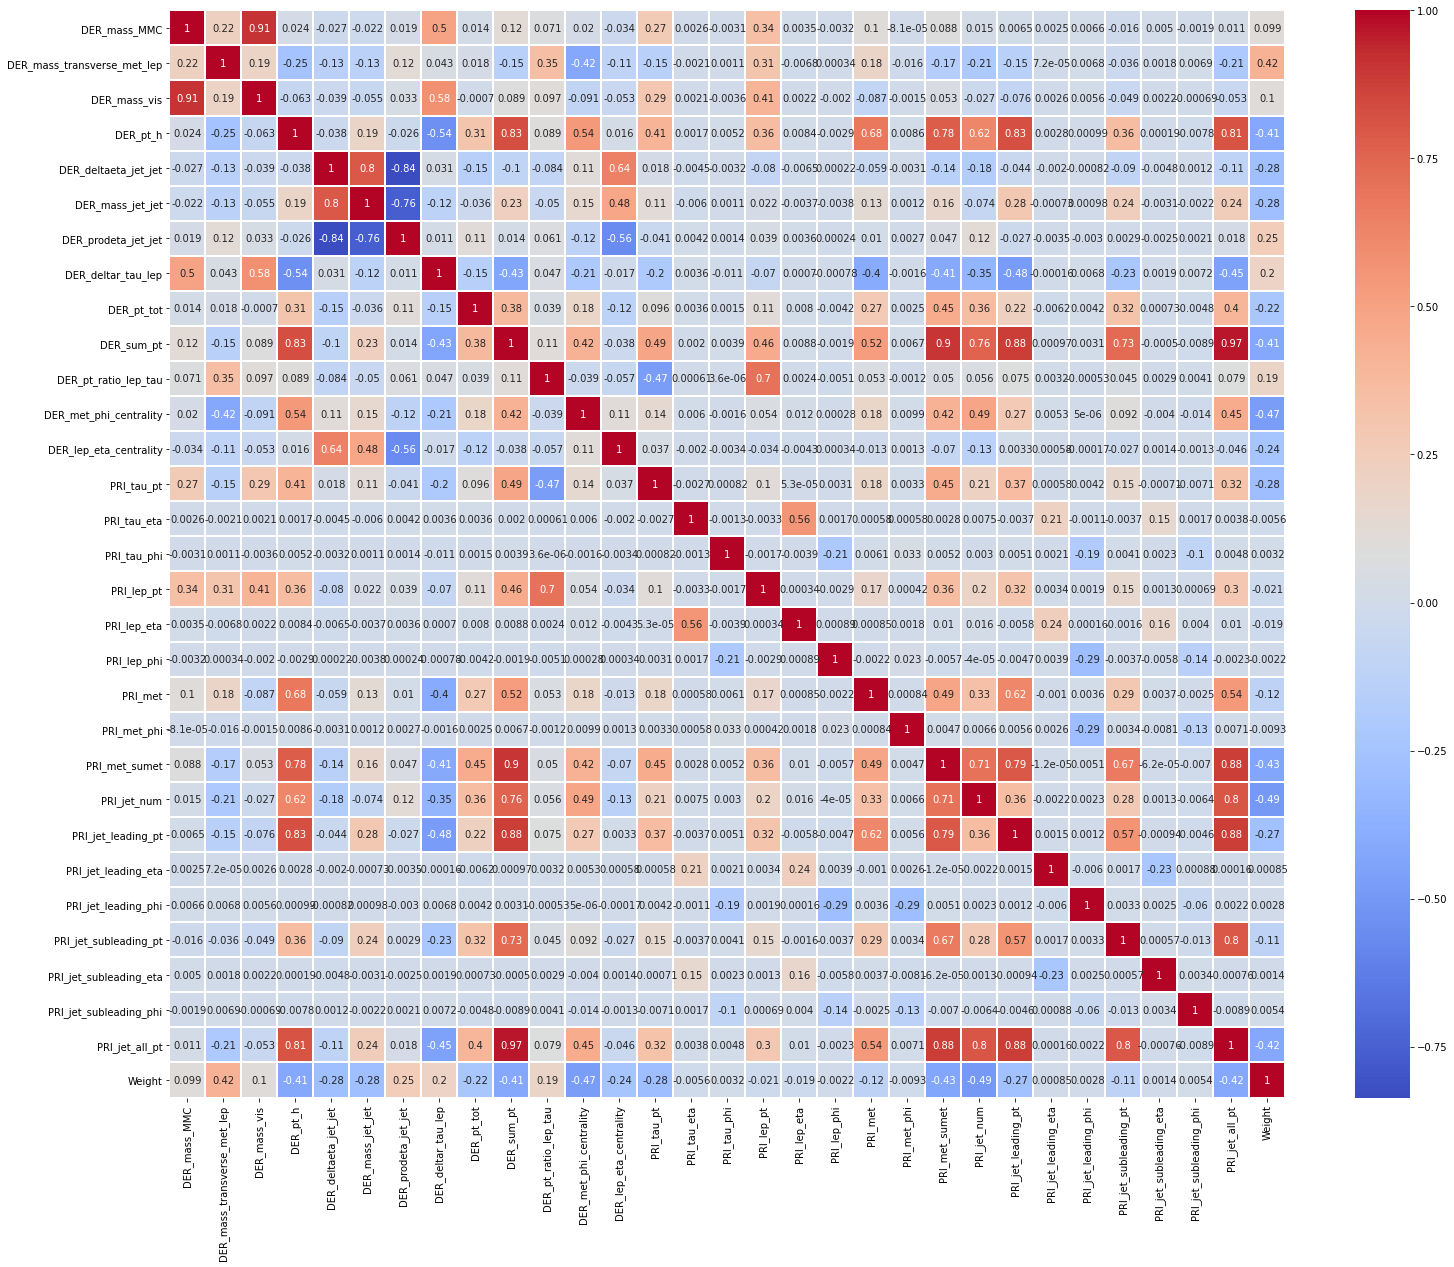

In [59]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1)

### Finding rows with 70% null data:

In [42]:
72543/250000*100

29.0172

In [15]:
df.count()

DER_mass_MMC                   211886
DER_mass_transverse_met_lep    250000
DER_mass_vis                   250000
DER_pt_h                       250000
DER_deltaeta_jet_jet            72543
DER_mass_jet_jet                72543
DER_prodeta_jet_jet             72543
DER_deltar_tau_lep             250000
DER_pt_tot                     250000
DER_sum_pt                     250000
DER_pt_ratio_lep_tau           250000
DER_met_phi_centrality         250000
DER_lep_eta_centrality          72543
PRI_tau_pt                     250000
PRI_tau_eta                    250000
PRI_tau_phi                    250000
PRI_lep_pt                     250000
PRI_lep_eta                    250000
PRI_lep_phi                    250000
PRI_met                        250000
PRI_met_phi                    250000
PRI_met_sumet                  250000
PRI_jet_num                    250000
PRI_jet_leading_pt             150087
PRI_jet_leading_eta            150087
PRI_jet_leading_phi            150087
PRI_jet_subl

In [37]:
# Finding all columns in train with NAN values:
col_cnt = df.count()

null_train = col_cnt[col_cnt/col_cnt.max()*100 < 30]
null_train.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'],
      dtype='object')

In [38]:
# Finding all columns in test with NAN values:
col_cnt_test = df_test.count()

null_test = col_cnt_test[col_cnt_test/col_cnt_test.max()*100 < 30][:-2]
null_test.index

Index(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_lep_eta_centrality', 'PRI_jet_subleading_pt'],
      dtype='object')

In [39]:
#  null_train & null_test columns
null_mismatch = set(null_train.index) - set(null_test.index)
null_mismatch

{'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'}

In [40]:
null_union = set(null_train.index).union(set(null_test.index))
null_union

{'DER_deltaeta_jet_jet',
 'DER_lep_eta_centrality',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_subleading_pt'}

## Checking properties of null columns:

<AxesSubplot:>

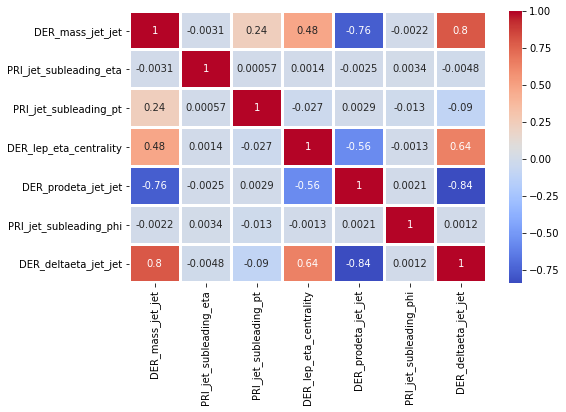

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(df[null_union].corr(), cmap='coolwarm', annot=True, linewidth=2)

In [31]:
df[null_union].describe()

,DER_mass_jet_jet,PRI_jet_subleading_eta,PRI_jet_subleading_pt,DER_lep_eta_centrality,DER_prodeta_jet_jet,PRI_jet_subleading_phi,DER_deltaeta_jet_jet
count,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000
mean,371.783360,-0.011845,57.679474,0.458290,-0.821688,-0.001582,2.403735
std,397.699325,2.031743,31.985782,0.398681,3.584362,1.816950,1.742226
min,13.602000,-4.500000,30.000000,0.000000,-18.066000,-3.142000,0.000000
25%,111.977000,-1.612000,37.312000,0.004000,-2.629000,-1.576500,0.882500
50%,225.885000,-0.010000,47.902000,0.454000,-0.244000,-0.002000,2.107000
75%,478.226000,1.589500,66.637000,0.879000,0.958000,1.576000,3.690000
max,4974.979000,4.500000,721.456000,1.000000,16.690000,3.142000,8.503000


### Analysing: DER_mass_MMC

In [57]:
df['DER_mass_MMC'].count()

211886

<AxesSubplot:xlabel='DER_mass_MMC', ylabel='Count'>

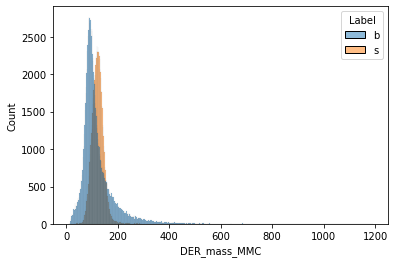

In [47]:
sns.histplot(data=df, x='DER_mass_MMC', hue='Label')

<AxesSubplot:xlabel='Label', ylabel='DER_mass_MMC'>

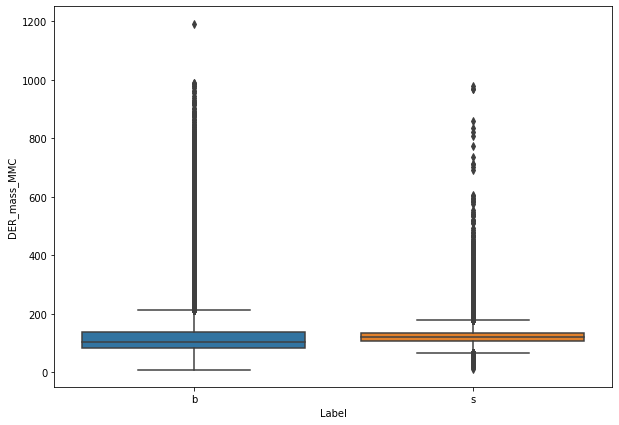

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, y='DER_mass_MMC', x='Label')

### Analysing: DER_deltaeta_jet_jet

## Feature Normalization:

In [ ]:
scaler_cols

In [ ]:
# sc = StandardScaler()
# scaler_cols = sc.fit_transform(df.drop(columns=target_cols))
# scaler_cols_test = sc.fit(df_test)
# df[cols] = scaler_cols
# df_test[cols] = scaler_cols_test

In [ ]:
sns.scatterplot(data=df, x='DER_mass_vis', y='Weight', hue='Label')

In [ ]:
sns.histplot(data=df, x='DER_mass_vis', hue='Label')